## SIR model (with deaths)
![](https://github.com/francescocicala/stochastic-modelling-playground/blob/master/images/sir.png?raw=true)
Sketch by Prof. Bortolussi

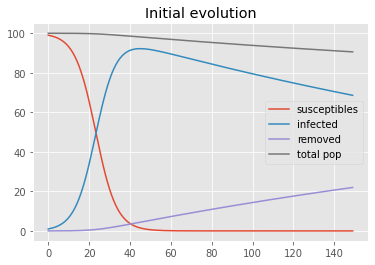

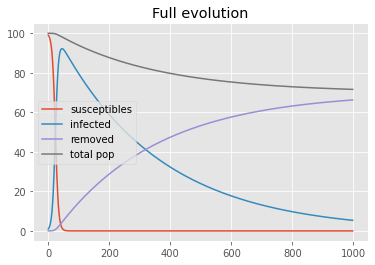

In [1]:
from models.helpers import evolve, show
from models.models import SIR_v2
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Instantiate the model
model = SIR_v2()

# Parameters
alpha = 0.003 # rate of people leaving the infected (dead or recovered)
beta = 0.002 # rate of people leaving the susceptibles per infected
f = 0.7 # rate of people that stop being infected who survive

deriv_params = (alpha, beta, f) # same order as in the deriv function's arguments

# Initial conditions
N0 = 100
S0 = 99
I0 = 1
R0 = 0
state0 = np.asarray([S0, I0, R0, N0])

# Evolve
timelength = 1000
history = evolve(model, state0, timelength, deriv_params)

# Visualize
legend = model.get_var_names()
show(history, legend=legend, title='Initial evolution', last_t=150)
show(history, legend=legend, title='Full evolution')